In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as pp

In [2]:
df=pd.read_csv("house price data.csv")
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


<Axes: >

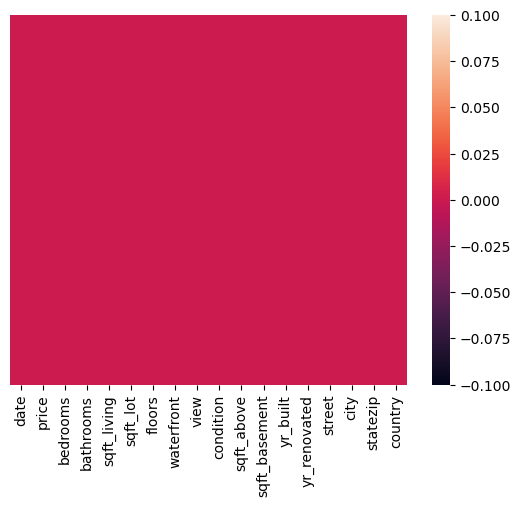

In [3]:
sns.heatmap(df.isnull(), yticklabels=False)

In [64]:
x= df.price.to_numpy()
y= df.floors.to_numpy()

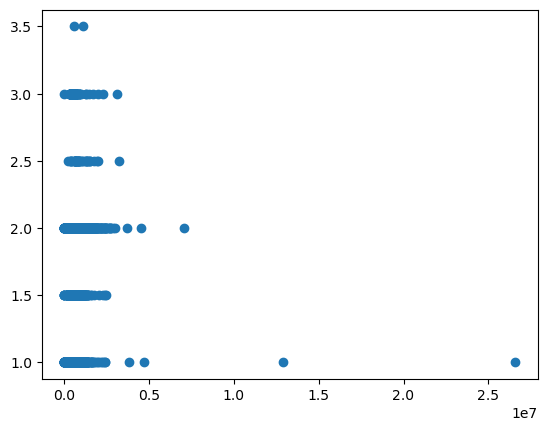

In [65]:
pp.scatter(x,y)

In [25]:
x=np.array(df["price"]).reshape(-1,1)
x.shape

(4600, 1)

In [26]:
y=np.array(df["floors"])
y.shape

(4600,)

In [28]:
#splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

In [29]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3220, 1)
(1380, 1)
(3220,)
(1380,)


In [55]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [42]:
#prediction
model=linear_model.LinearRegression()
model.fit(x_train, y_train)
prdct=model.predict(x_test)
prdct

array([1.50315074, 1.48442129, 1.51020249, ..., 1.48769331, 1.49129816,
       1.52176736])

In [43]:
#mean squared error
print("mean squared error is:", mean_squared_error(y_test,prdct))

mean squared error is: 0.278388918993802


In [58]:
#cross validation
cross_val_score(model, x_train, y_train, scoring='neg_mean_squared_error', cv=5)

array([-0.35787422, -0.2931805 , -0.25001402, -0.29310564, -0.28675256])

In [44]:
print("weights:", model.coef_)
print("intercept", model.intercept_)

weights: [1.12827981e-07]
intercept 1.450685727266683


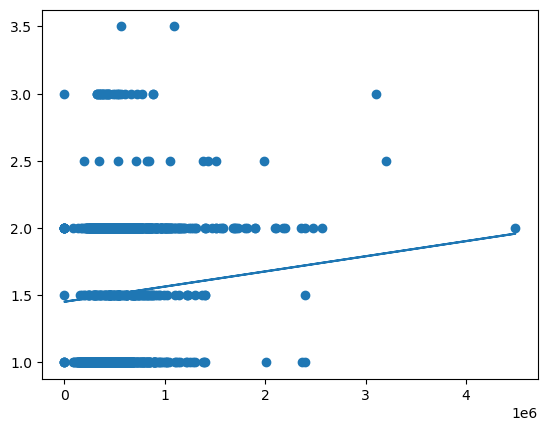

In [53]:
#plot test
pp.scatter(x_test, y_test)
pp.plot(x_test, prdct)
pp.show()

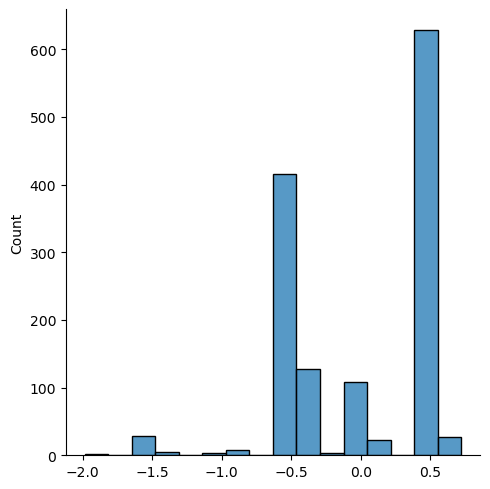

In [59]:
sns.displot(prdct-y_test)

In [62]:
from sklearn.metrics import r2_score

In [63]:
score=r2_score(prdct,y_test)
score

-170.82136401456424